Aprendisaje no supervisado gerar imagenes
Diego Roberto Arancbia Delgado
link del repositorio:https://github.com/drArancibiaDelgado/sis420-/tree/main/Examenes/Final


In [1]:
#importando librerias necesarias
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('dataset_0.csv', delimiter=",")

data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2       86  185  103   86  185  103   86  185  103   86  185  103  255  255   
3      246  142  226  246  142  226  246  142  226  246  142  226  246  142   
4      144    1  194  144    1  194  144    1  194  144    1  194  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  211   14   11  255  255  255  211   14   11  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  218  215  249  218  215  249  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221  166  218  221  166   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      226  246  142  226  246  142  226  246  142  226  246  142  226  246   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  164  190  236  164  190  236  164  190  236  164  190  236  164  190   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      218  221  166  218  221  166  218  221  166  218  221  166  218  221   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      142  226  246  142  226  246  142  226  246  142  226  246  142  226   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  236  164  190  236  164  190  236  164  190  236  164  190  236  164   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      246  142  226  255  255  255  255  255  255  255  255  255  255  255   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

In [7]:
data

0    1    2    3    4    5    6    7    8    9   10   11   12   13  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2       86  185  103   86  185  103   86  185  103   86  185  103  255  255   
3      246  142  226  246  142  226  246  142  226  246  142  226  246  142   
4      144    1  194  144    1  194  144    1  194  144    1  194  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  211   14   11  255  255  255  211   14   11  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  218  215  249  218  215  249  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        14   15   16   17   18   19   20   21   22   23   24   25   26   27  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221  166  218  221  166   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      226  246  142  226  246  142  226  246  142  226  246  142  226  246   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  164  190  236  164  190  236  164  190  236  164  190  236  164  190   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        28   29   30   31   32   33   34   35   36   37   38   39   40   41  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      218  221  166  218  221  166  218  221  166  218  221  166  218  221   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      142  226  246  142  226  246  142  226  246  142  226  246  142  226   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  236  164  190  236  164  190  236  164  190  236  164  190  236  164   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        42   43   44   45   46   47   48   49   50   51   52   53   54   55  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      166  218  221  166  218  221  166  218  221  166  218  221  166  218   
2      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
3      246  142  226  255  255  255  255  255  255  255  255  255  255  255   
4      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
49995  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49996  190  236  164  190  236  164  190  236  164  190  236  164  190  236   
49997  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49998  255  255  255  255  255  255  255  255  255  255  255  255  255  255   
49999  255  255  255  255  255  255  255  255  255  255  255  255  255  255   

        56   57   58   59   60   61   62   63   64   65   66   67   68   69  \
0      255  255  255  255  255  255  255  255  255  255  255  255  255  255   
1      221  166  218  221  166  218  221  166  218  221

In [8]:
scaled_data

array([[ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391],
       [-0.11819805,  0.49083106,  0.53142306, ...,  0.04081723,
         0.03973075,  0.04089391],
       [-1.05953886,  0.10153576, -0.85377449, ...,  0.04081723,
         0.03973075,  0.04089391],
       ...,
       [ 0.49367348,  0.45544058,  0.860114  , ...,  0.04081723,
         0.03973075,  0.04089391],
       [ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391],
       [ 0.92904361,  0.92731367,  0.93054777, ...,  0.04081723,
         0.03973075,  0.04089391]])

In [9]:
# KMeans
from sklearn.cluster import KMeans

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)


y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([1, 1, 1, ..., 1, 0, 1])

In [10]:
# Visualización de los clusters
kmeans.cluster_centers_

array([[ 0.9216427 ,  0.91996533,  0.92108819, ..., -0.39302702,
        -0.37557203, -0.39531698],
       [ 0.03996148,  0.03659908,  0.04332331, ...,  0.02712332,
         0.02578342,  0.02731137],
       [-0.6516068 , -0.63276346, -0.66938861, ...,  0.04081723,
         0.03973075,  0.04089391]])

In [12]:
# Visualización de los clusters
import numpy as np


# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-1.53020927 -0.05182299  0.36707759 ...  0.04081723  0.03973075
   0.04089391]
 [-1.67141039 -1.84494073 -0.1963926  ...  0.04081723  0.03973075
   0.04089391]
 [-1.76554448 -0.12260395  0.63707372 ...  0.04081723  0.03973075
   0.04089391]
 [ 0.92904361  0.92731367  0.93054777 ...  0.04081723  0.03973075
   0.04089391]]
Predicciones de cluster para las nuevas muestras:
[2 1 1 1]


Utilizaremos el metodo de la silueta para calcular el numero adecuado de cluster

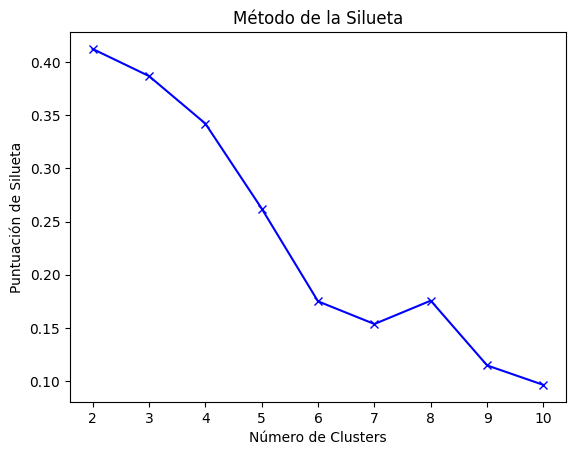

El número óptimo de clusters según la puntuación de silueta es: 2


In [13]:
# Visualizar los centroides de los clusters
#metodo de la silueta
import numpy as np
none_y = scaled_data[:, :-1]
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


Accuracy: 0.98
Confusion Matrix:
[[ 144    0    0    0    0    0    1    0    0    5]
 [   0 4755    0    0    0    1   10    0    7    5]
 [   0    0  171    6    0    1    0    5    0    1]
 [   0    0    4  355    1    1    1    7    0    2]
 [   0    2    0    7 1092    0    0    8   14    0]
 [   2    1    0    0    0  270    3    0    0    0]
 [  10   11    0    0    0    4  648    1    1    2]
 [   0    1    4    1    5    0    0  324    0    0]
 [   0   11    0    0    9    0    0    0 1860    0]
 [   1    1    0    1    0    0    7    0    0  216]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       150
           1       0.99      1.00      0.99      4778
           2       0.96      0.93      0.94       184
           3       0.96      0.96      0.96       371
           4       0.99      0.97      0.98      1123
           5       0.97      0.98      0.98       276
           6       0.97      0.96 

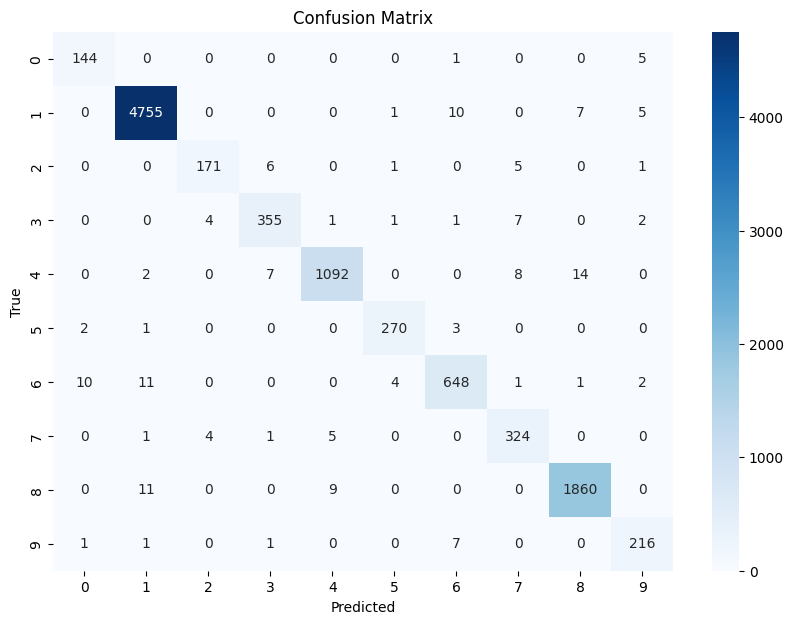

In [21]:
# Importando librerías adicionales para la clasificación
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


X = scaled_data
y = kmeans.labels_  

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Escalar los datos (si es necesario, ya que hemos escalado previamente)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de clasificación
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train_resampled)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


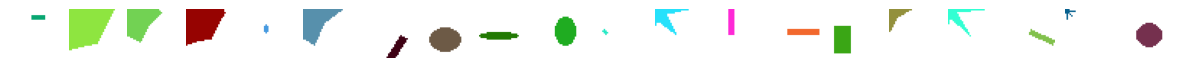

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert scaled_data.shape[1] == 3072, "Cada fila del DataFrame debe tener 3072 valores para una imagen de 32x32x3"

# Convertir cada fila en una imagen de 32x32x3
def row_to_image(row):
    image = row.values.reshape(32, 32, 3)
    return image

# Seleccionar un subconjunto de imágenes para visualizar 
num_images_to_show = 20
sampled_rows = data.sample(n=num_images_to_show, random_state=42)

# Crear una figura para visualizar las imágenes
fig, axes = plt.subplots(1, num_images_to_show, figsize=(15, 5))

for i, (index, row) in enumerate(sampled_rows.iterrows()):
    image = row_to_image(row)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()
